In [93]:
from xgboost import XGBRegressor as XGBR
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.linear_model import LinearRegression as LinearR
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import KFold, cross_val_score as CVS, train_test_split as TTS
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from time import time
import datetime
import xgboost as xgb
import pickle
import sys

In [3]:
data = fetch_california_housing()
X = data.data
y = data.target

In [4]:
Xtrain,Xtest,Ytrain,Ytest = TTS(X,y,test_size=0.3,random_state=420)
reg = XGBR(n_estimators=100).fit(Xtrain,Ytrain)

In [5]:
reg.predict(Xtest)

array([0.98966706, 0.54727226, 2.7344372 , ..., 2.4994142 , 1.531444  ,
       0.6539396 ], dtype=float32)

In [6]:
reg.score(Xtest,Ytest) #R^2

0.8380681173585057

In [7]:
MSE(Ytest,reg.predict(Xtest))

0.21729684123063153

In [8]:
reg.feature_importances_

array([0.4787839 , 0.07316896, 0.04683103, 0.0275637 , 0.02276278,
       0.1520953 , 0.09354991, 0.10524441], dtype=float32)

In [10]:
reg = XGBR(n_estimators=100)
CVS(reg,Xtrain,Ytrain,cv=5).mean()

0.8276437372198705

In [11]:
CVS(reg,Xtrain,Ytrain,cv=5,scoring='neg_mean_squared_error').mean()

-0.22858635883886488

In [16]:
rfr = RFR(n_estimators=100)
CVS(rfr,Xtrain,Ytrain,cv=5).mean()

0.7974610821591341

In [17]:
CVS(rfr,Xtrain,Ytrain,cv=5,scoring='neg_mean_squared_error').mean()

-0.2678190371559353

In [18]:
lr = LinearR()
CVS(lr,Xtrain,Ytrain,cv=5).mean()

0.6044172522670996

In [19]:
CVS(lr,Xtrain,Ytrain,cv=5,scoring='neg_mean_squared_error').mean()

-0.5248837357845154

In [20]:
reg = XGBR(n_estimators=10,silent=False)
CVS(reg,Xtrain,Ytrain,cv=5,scoring='neg_mean_squared_error').mean()

C:\Users\86151\miniconda3\envs\text-mine\lib\site-packages\xgboost\core.py:160: UserWarning: [14:40:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\86151\miniconda3\envs\text-mine\lib\site-packages\xgboost\core.py:160: UserWarning: [14:40:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\86151\miniconda3\envs\text-mine\lib\site-packages\xgboost\core.py:160: UserWarning: [14:40:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\86151\miniconda3\en

-0.29261541204338243

In [21]:
def plot_learning_curve(estimator,title, X, y,ax=None, ylim=None,cv=None,n_jobs=None):
    from sklearn.model_selection import learning_curve
    import matplotlib.pyplot as plt
    import numpy as np
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y
    ,shuffle=True
    ,cv=cv
    # ,random_state=420
    ,n_jobs=n_jobs)
    if ax == None:
        ax = plt.gca()
    else:
        ax = plt.figure()
    ax.set_title(title)
    if ylim is not None:
        ax.set_ylim(*ylim)
    ax.set_xlabel("Training examples")
    ax.set_ylabel("Score")
    ax.grid()
    ax.plot(train_sizes, np.mean(train_scores, axis=1), 'o-',color="r",label="Training score")
    ax.plot(train_sizes, np.mean(test_scores, axis=1), 'o-',color="g",label="Test score")
    ax.legend(loc="best")
    return ax

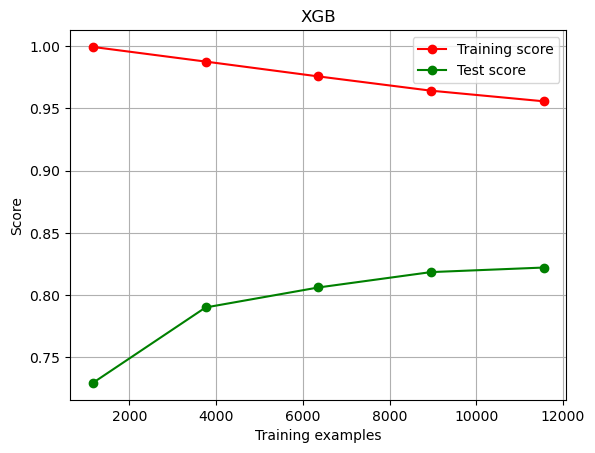

In [22]:
cv = KFold(n_splits=5, shuffle = True, random_state=42)
plot_learning_curve(XGBR(n_estimators=100,random_state=420)
,"XGB",Xtrain,Ytrain,ax=None,cv=cv)
plt.show()

210 0.8272770784091446


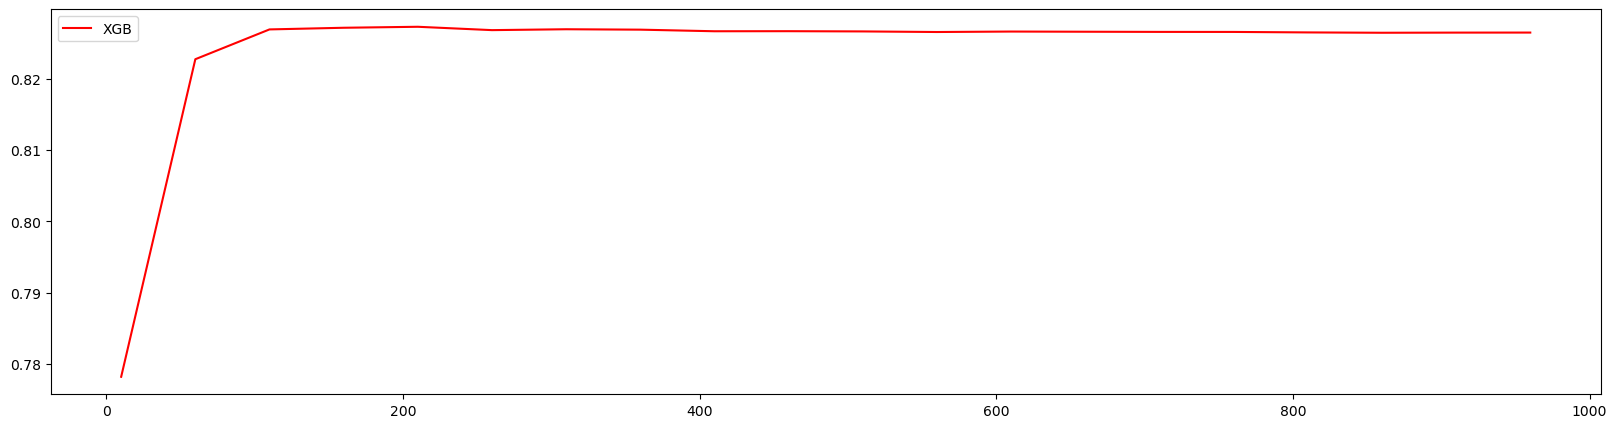

In [23]:
axisx = range(10,1010,50)
rs = []
for i in axisx:
    reg = XGBR(n_estimators=i,random_state=420)
    rs.append(CVS(reg,Xtrain,Ytrain,cv=cv).mean())
print(axisx[rs.index(max(rs))],max(rs))
plt.figure(figsize=(20,5))
plt.plot(axisx,rs,c="red",label="XGB")
plt.legend()
plt.show()

200 0.8272922458177236 0.00011566260573138091
50 0.8207303623748089 0.0001083915354759886
200 0.8272922458177236 0.00011566260573138091 0.029943630960416974


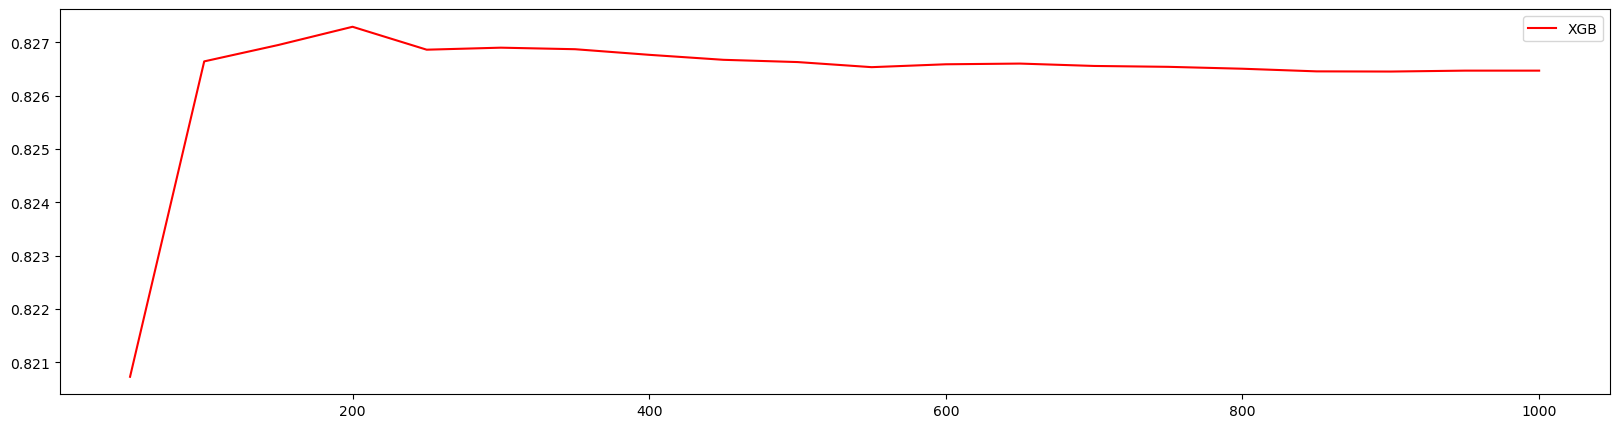

In [25]:
axisx = range(50,1050,50)
rs = []
var = []
ge = []
for i in axisx:
    reg = XGBR(n_estimators=i,random_state=420)
    cvresult = CVS(reg,Xtrain,Ytrain,cv=cv)
    rs.append(cvresult.mean())
    var.append(cvresult.var())
    ge.append((1 - cvresult.mean())**2+cvresult.var())
print(axisx[rs.index(max(rs))],max(rs),var[rs.index(max(rs))])
print(axisx[var.index(min(var))],rs[var.index(min(var))],min(var))
print(axisx[ge.index(min(ge))],rs[ge.index(min(ge))],var[ge.index(min(ge))],min(ge))
plt.figure(figsize=(20,5))
plt.plot(axisx,rs,c="red",label="XGB")
plt.legend()
plt.show()

190 0.8273008797482652 0.00011691715760894534
180 0.8271660472678217 0.00011115037246203553
190 0.8273008797482652 0.00011691715760894534 0.029941903293332114


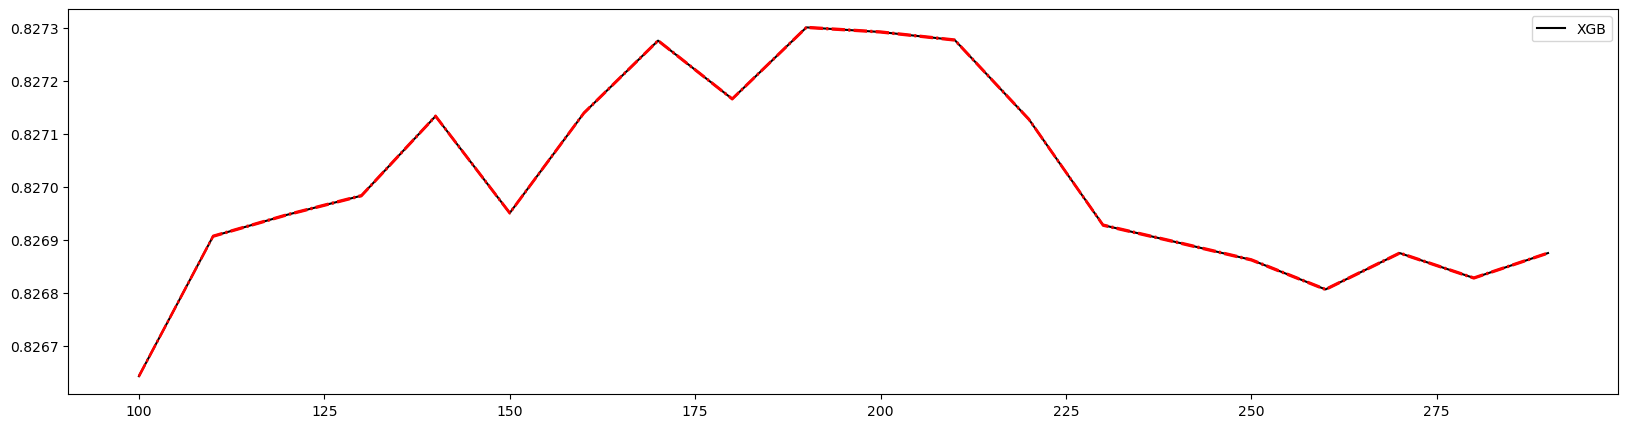

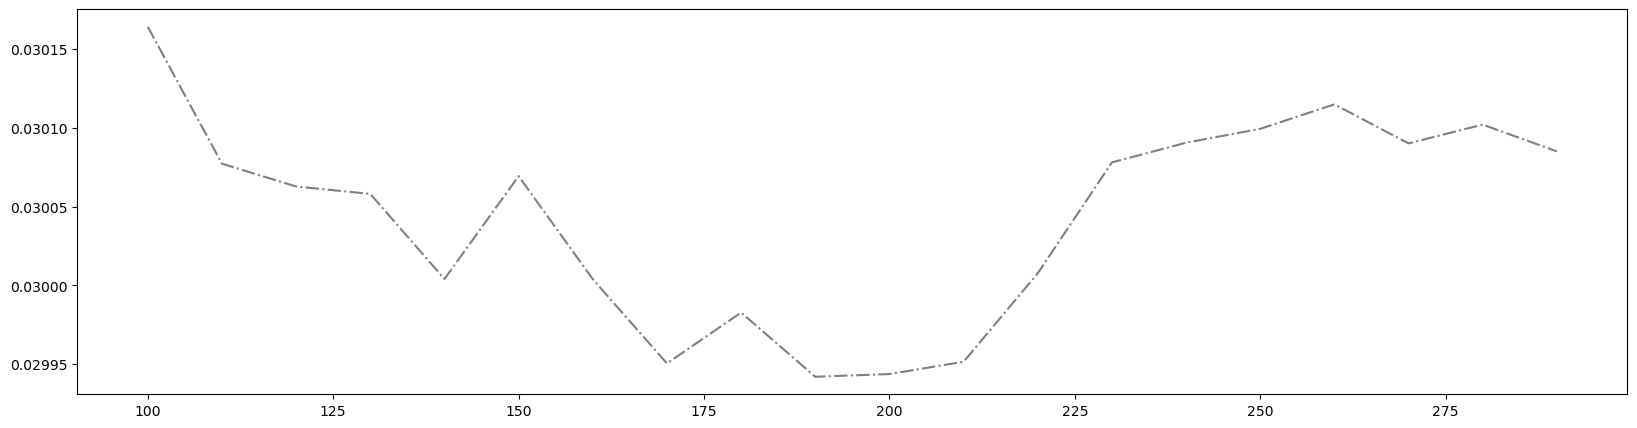

In [26]:
axisx = range(100,300,10)
rs = []
var = []
ge = []
for i in axisx:
    reg = XGBR(n_estimators=i,random_state=420)
    cvresult = CVS(reg,Xtrain,Ytrain,cv=cv)
    rs.append(cvresult.mean())
    var.append(cvresult.var())
    ge.append((1 - cvresult.mean())**2+cvresult.var())
print(axisx[rs.index(max(rs))],max(rs),var[rs.index(max(rs))])
print(axisx[var.index(min(var))],rs[var.index(min(var))],min(var))
print(axisx[ge.index(min(ge))],rs[ge.index(min(ge))],var[ge.index(min(ge))],min(ge))
rs = np.array(rs)
var = np.array(var)*0.01
plt.figure(figsize=(20,5))
plt.plot(axisx,rs,c="black",label="XGB")

plt.plot(axisx,rs+var,c="red",linestyle='-.')
plt.plot(axisx,rs-var,c="red",linestyle='-.')
plt.legend()
plt.show()

plt.figure(figsize=(20,5))
plt.plot(axisx,ge,c="gray",linestyle='-.')
plt.show()

0.9473684210526315 0.8287333896013778


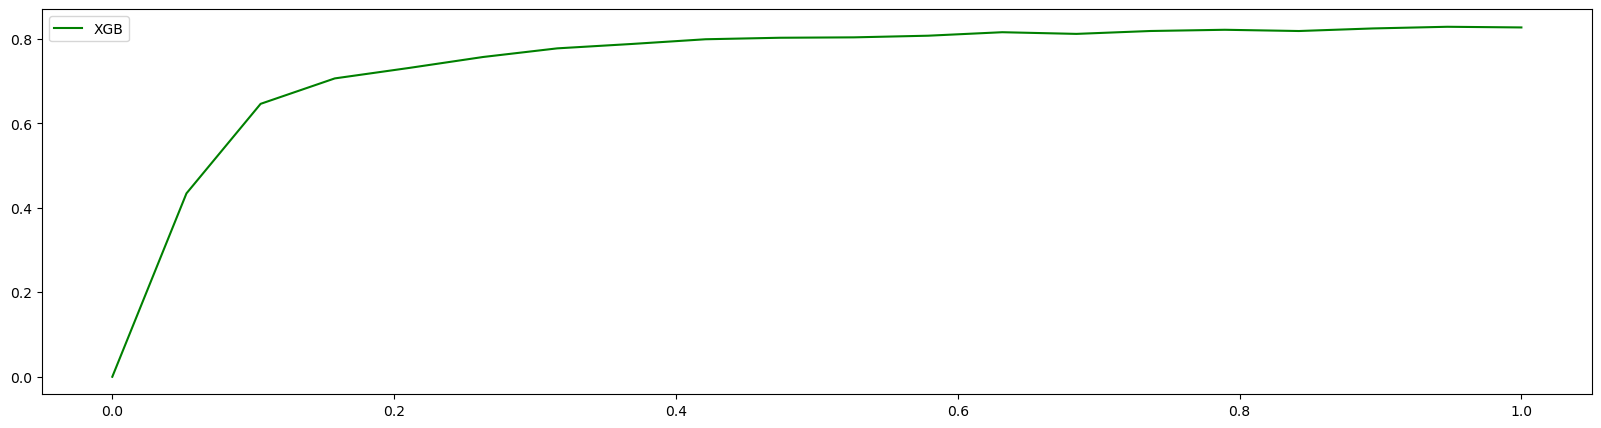

In [28]:
axisx = np.linspace(0,1,20)
rs = []
for i in axisx:
    reg = XGBR(n_estimators=180,subsample=i,random_state=420)
    rs.append(CVS(reg,Xtrain,Ytrain,cv=cv).mean())
print(axisx[rs.index(max(rs))],max(rs))
plt.figure(figsize=(20,5))
plt.plot(axisx,rs,c="green",label="XGB")
plt.legend()
plt.show()

In [29]:
def regassess(reg,Xtrain,Ytrain,cv,scoring = ["r2"],show=True):
    score = []
    for i in range(len(scoring)):
        if show:
            print("{}:{:.2f}".format(scoring[i]
            ,CVS(reg
            ,Xtrain,Ytrain
            ,cv=cv,scoring=scoring[i]).mean()))
            score.append(CVS(reg,Xtrain,Ytrain,cv=cv,scoring=scoring[i]).mean())
    return score

In [30]:
regassess(reg,Xtrain,Ytrain,cv,scoring = ["r2","neg_mean_squared_error"])

r2:0.83
neg_mean_squared_error:-0.23


[0.8271660472678217, -0.22907022395722837]

learning_rate = 0
r2:-0.00
neg_mean_squared_error:-1.33
00:09:246111
	
learning_rate = 0.2
r2:0.83
neg_mean_squared_error:-0.22
00:11:538877
	
learning_rate = 0.5
r2:0.80
neg_mean_squared_error:-0.27
00:09:118371
	
learning_rate = 1
r2:0.71
neg_mean_squared_error:-0.39
00:09:199843
	
r2:0.82
neg_mean_squared_error:-0.23
r2:0.83
neg_mean_squared_error:-0.22
r2:0.83
neg_mean_squared_error:-0.22
r2:0.83
neg_mean_squared_error:-0.22
r2:0.83
neg_mean_squared_error:-0.23
r2:0.83
neg_mean_squared_error:-0.23
r2:0.82
neg_mean_squared_error:-0.24
r2:0.81
neg_mean_squared_error:-0.25
r2:0.81
neg_mean_squared_error:-0.25
r2:0.80
neg_mean_squared_error:-0.27
r2:0.80
neg_mean_squared_error:-0.27
r2:0.79
neg_mean_squared_error:-0.28
r2:0.78
neg_mean_squared_error:-0.29
r2:0.77
neg_mean_squared_error:-0.30
r2:0.76
neg_mean_squared_error:-0.32
r2:0.76
neg_mean_squared_error:-0.32
r2:0.74
neg_mean_squared_error:-0.35
r2:0.74
neg_mean_squared_error:-0.35
r2:0.73
neg_mean_squared_error:-0.36
0.1 0.833733

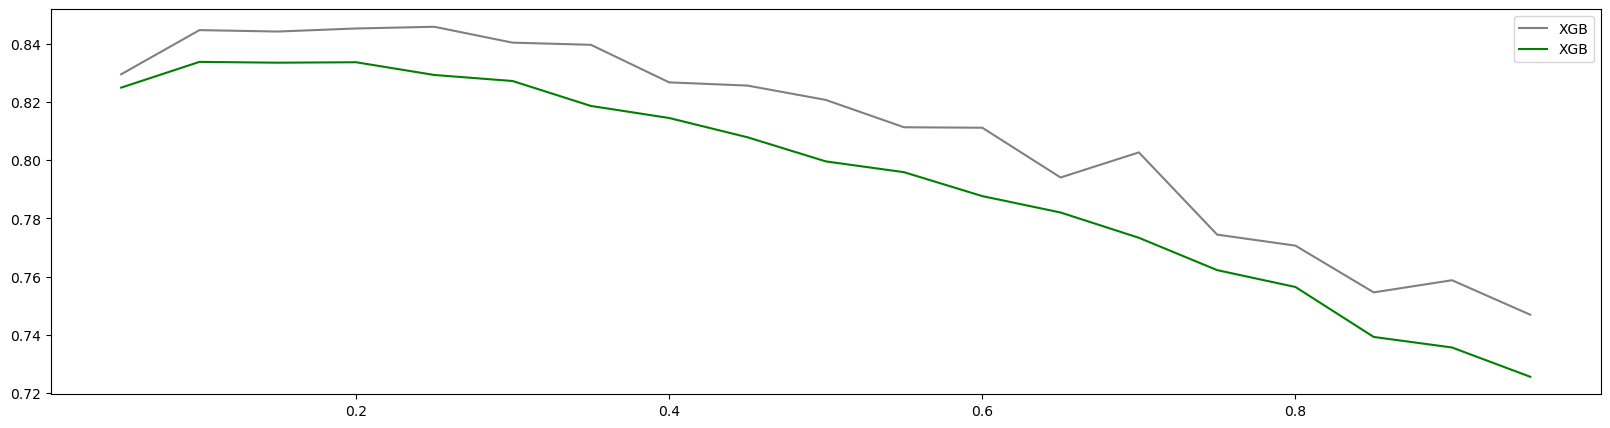

In [33]:
from time import time
import datetime
for i in [0,0.2,0.5,1]:
    time0=time()
    reg = XGBR(n_estimators=190,random_state=420,learning_rate=i)
    print("learning_rate = {}".format(i))
    regassess(reg,Xtrain,Ytrain,cv,scoring = ["r2","neg_mean_squared_error"])
    print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))
    print("\t")
axisx = np.arange(0.05,1,0.05)
rs = []
te = []
for i in axisx:
    reg = XGBR(n_estimators=190,random_state=420,learning_rate=i)
    score = regassess(reg,Xtrain,Ytrain,cv,scoring =
    ["r2","neg_mean_squared_error"])
    test = reg.fit(Xtrain,Ytrain).score(Xtest,Ytest)
    rs.append(score[0])
    te.append(test)
print(axisx[rs.index(max(rs))],max(rs))
plt.figure(figsize=(20,5))
plt.plot(axisx,te,c="gray",label="XGB")
plt.plot(axisx,rs,c="green",label="XGB")
plt.legend()
plt.show()

In [35]:
for booster in ['gbtree','gblinear','dart']:
    reg = XGBR(n_estimators=190,random_state=420,learning_rate=0.1,booster = booster).fit(Xtrain,Ytrain)
    print(booster)
    print(reg.score(Xtest,Ytest))

gbtree
0.8449163612743731
gblinear
0.5010572913568258
dart
0.8449163494338581


In [36]:
reg = XGBR(n_estimators=190,random_state=420).fit(Xtrain,Ytrain)
reg.score(Xtest,Ytest)

0.8403754689486382

In [37]:
MSE(Ytest,reg.predict(Xtest))

0.2142005997495498

In [39]:
dtrain = xgb.DMatrix(Xtrain,Ytrain)
dtest = xgb.DMatrix(Xtest,Ytest)

In [40]:
param = {'silent':False,'objective':'reg:linear','eta':0.1}
num_round = 190

In [41]:
bst = xgb.train(param,dtrain,num_round)

C:\Users\86151\miniconda3\envs\text-mine\lib\site-packages\xgboost\core.py:160: UserWarning: [16:39:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
C:\Users\86151\miniconda3\envs\text-mine\lib\site-packages\xgboost\core.py:160: UserWarning: [16:39:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


In [42]:
preds = bst.predict(dtest)

In [44]:
r2_score(Ytest,preds)

0.8449163612743731

In [45]:
MSE(Ytest,preds)

0.20810716377724564

In [ ]:
#better and faster than sklearn XGBoost

In [ ]:
#gamma: complexity control

In [72]:
dfull = xgb.DMatrix(X,y)
param1 = {'silent':True,'objective':'reg:linear','gamma':0,'eval_metric':'mae'}
num_round = 1000
n_fold = 5

In [73]:
cvresult1 = xgb.cv(param1,dfull,num_round,n_fold)

C:\Users\86151\miniconda3\envs\text-mine\lib\site-packages\xgboost\core.py:160: UserWarning: [17:53:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
C:\Users\86151\miniconda3\envs\text-mine\lib\site-packages\xgboost\core.py:160: UserWarning: [17:53:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


In [74]:
cvresult1

,train-mae-mean,train-mae-std,test-mae-mean,test-mae-std
0,0.736825,0.001399,0.740733,0.008775
1,0.617459,0.002247,0.625681,0.006814
2,0.532513,0.001747,0.544167,0.003782
3,0.477733,0.002580,0.492129,0.004532
4,0.436988,0.002366,0.454417,0.005271
...,...,...,...,...
995,0.017554,0.000233,0.309495,0.002774
996,0.017508,0.000234,0.309497,0.002766
997,0.017461,0.000237,0.309498,0.002760
998,0.017425,0.000226,0.309503,0.002750


[]

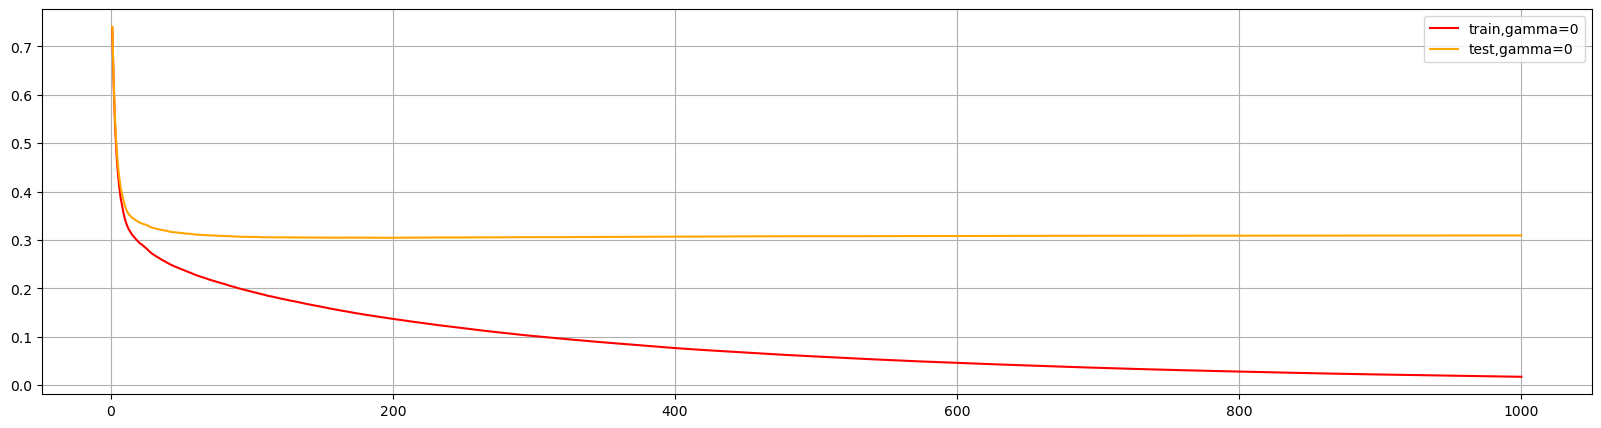

In [75]:
plt.figure(figsize = (20,5))
plt.grid()
plt.plot(range(1,1001),cvresult1.iloc[:,0],c = 'red',label = 'train,gamma=0')
plt.plot(range(1,1001),cvresult1.iloc[:,2],c = 'orange',label = 'test,gamma=0')
plt.legend()
plt.plot()

In [76]:
param2 = {'silent':True,'objective':'reg:linear','gamma':1,'eval_metric':'mae'}
num_round = 1000
n_fold = 5

cvresult2 = xgb.cv(param2,dfull,num_round,n_fold)

C:\Users\86151\miniconda3\envs\text-mine\lib\site-packages\xgboost\core.py:160: UserWarning: [17:53:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
C:\Users\86151\miniconda3\envs\text-mine\lib\site-packages\xgboost\core.py:160: UserWarning: [17:53:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


[]

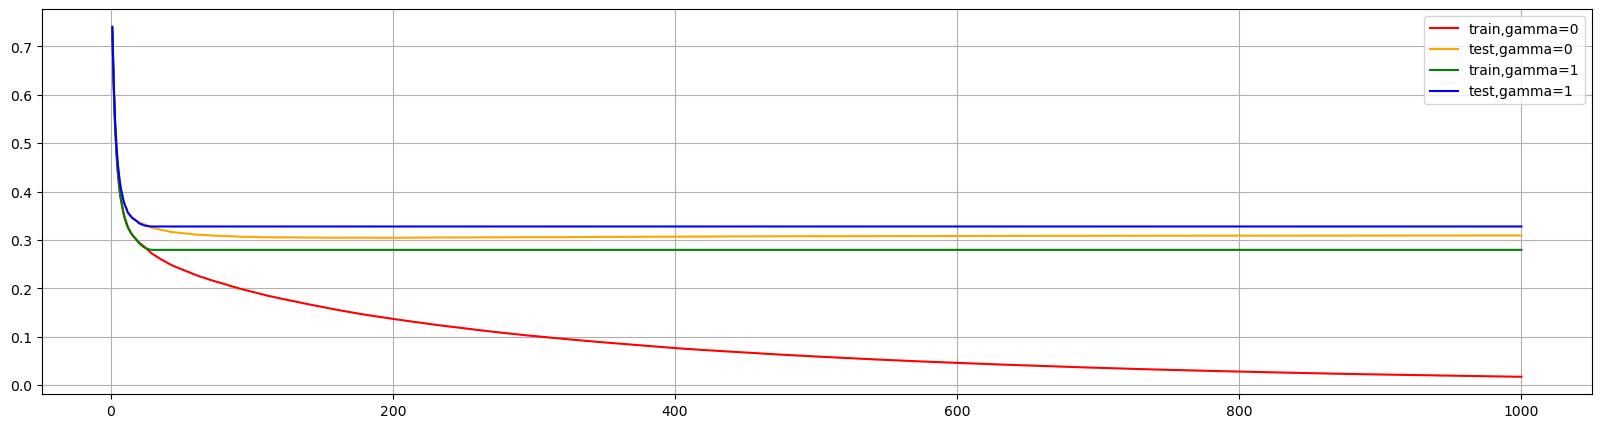

In [77]:
plt.figure(figsize = (20,5))
plt.grid()
plt.plot(range(1,1001),cvresult1.iloc[:,0],c = 'red',label = 'train,gamma=0')
plt.plot(range(1,1001),cvresult1.iloc[:,2],c = 'orange',label = 'test,gamma=0')
plt.plot(range(1,1001),cvresult2.iloc[:,0],c = 'green',label = 'train,gamma=1')
plt.plot(range(1,1001),cvresult2.iloc[:,2],c = 'blue',label = 'test,gamma=1')
plt.legend()
plt.plot()

In [78]:
param3 = {'silent':True,'objective':'reg:linear','subsample':1, 'max_depth':6,'eta':0.3,'gamma':0,'lambda':1,'alpha':0
         ,'colsample_bytree':1,'colsample_bylevel':1,'colsample_bynode':1,'nfold':5}

In [81]:
cvresult3 = xgb.cv(param3,dfull,num_round)

C:\Users\86151\miniconda3\envs\text-mine\lib\site-packages\xgboost\core.py:160: UserWarning: [20:57:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
C:\Users\86151\miniconda3\envs\text-mine\lib\site-packages\xgboost\core.py:160: UserWarning: [20:57:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "nfold", "silent" } are not used.

  warnings.warn(smsg, UserWarning)


[]

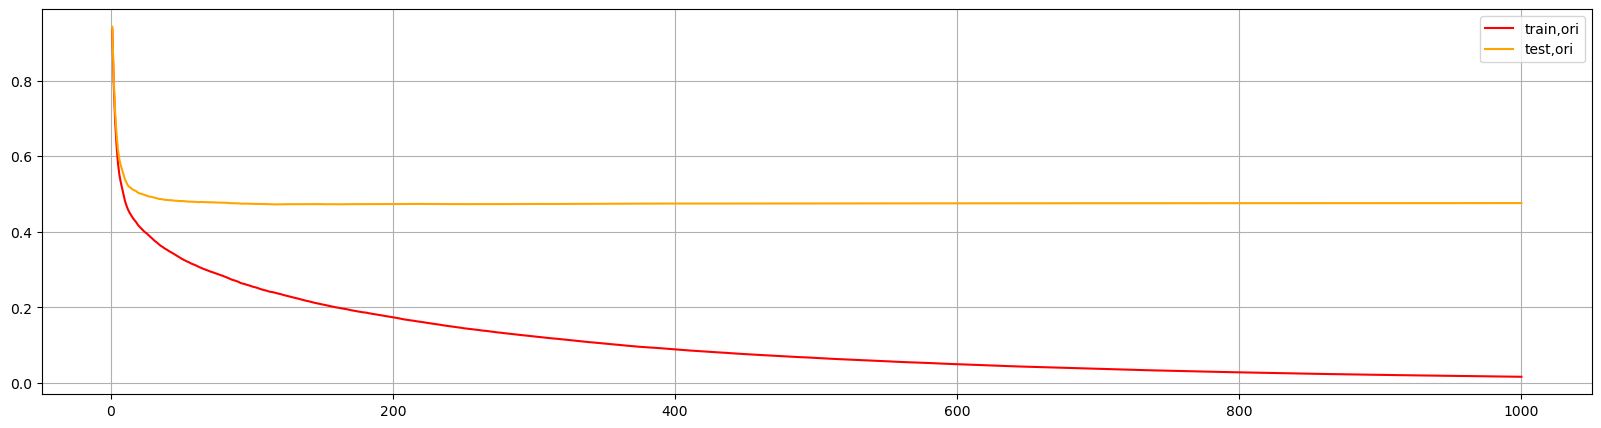

In [83]:
plt.figure(figsize = (20,5))
plt.grid()
plt.plot(range(1,1001),cvresult3.iloc[:,0],c = 'red',label = 'train,ori')
plt.plot(range(1,1001),cvresult3.iloc[:,2],c = 'orange',label = 'test,ori')
plt.legend()
plt.plot()

C:\Users\86151\miniconda3\envs\text-mine\lib\site-packages\xgboost\core.py:160: UserWarning: [21:07:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
C:\Users\86151\miniconda3\envs\text-mine\lib\site-packages\xgboost\core.py:160: UserWarning: [21:07:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "nfold", "silent" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\86151\miniconda3\envs\text-mine\lib\site-packages\xgboost\core.py:160: UserWarning: [21:07:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:209: reg:linear is now deprecated in favor of re

[]

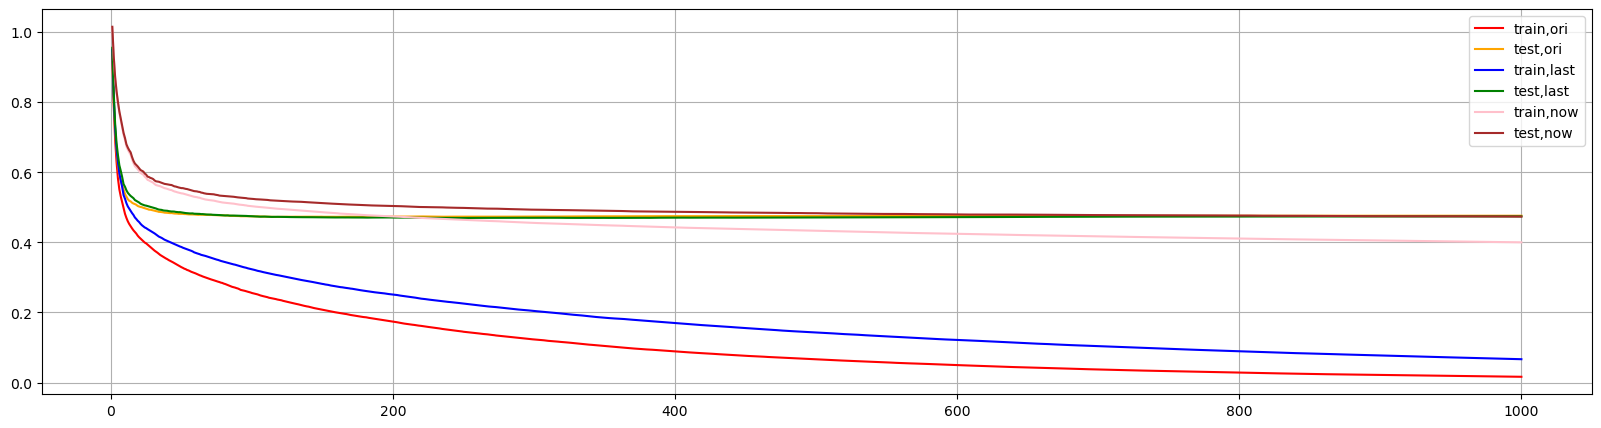

In [90]:
param4 = {'silent':True,'objective':'reg:linear','subsample':1, 'max_depth':5,'eta':0.3,'gamma':0,'lambda':1,'alpha':0
         ,'colsample_bytree':1,'colsample_bylevel':1,'colsample_bynode':1,'nfold':5}
param5 = {'silent':True,'objective':'reg:linear','subsample':1, 'max_depth':2,'eta':0.3,'gamma':0,'lambda':1,'alpha':0
         ,'colsample_bytree':1,'colsample_bylevel':1,'colsample_bynode':1,'nfold':5}

cvresult4 = xgb.cv(param4,dfull,num_round)
cvresult5 = xgb.cv(param5,dfull,num_round)

plt.figure(figsize = (20,5))
plt.grid()
plt.plot(range(1,1001),cvresult3.iloc[:,0],c = 'red',label = 'train,ori')
plt.plot(range(1,1001),cvresult3.iloc[:,2],c = 'orange',label = 'test,ori')
plt.plot(range(1,1001),cvresult4.iloc[:,0],c = 'blue',label = 'train,last')
plt.plot(range(1,1001),cvresult4.iloc[:,2],c = 'green',label = 'test,last')
plt.plot(range(1,1001),cvresult5.iloc[:,0],c = 'pink',label = 'train,now')
plt.plot(range(1,1001),cvresult5.iloc[:,2],c = 'brown',label = 'test,now')
plt.legend()
plt.plot()

In [92]:
pickle.dump(cvresult5,open('xgboostla.dat','wb'))